In [5]:
using Plots

# Simulating a causal stochastic process

First, we create a `step` function that simulates one step.

In [1]:
function step(history)
    x_t = last(history)
    x_tp1 = x_t + rand([0,1])
    return x_tp1
end

step (generic function with 1 method)

Next, the `simulate` function calls `step` repeatedly and saves the results as a history.

In [2]:
function simulate(step; n_steps=100, x_0=0)
    history = Int[x_0] # first create an array to hold the history of outcomes (preallocation is not as important in Julia)
    for _ in 1:n_steps
        # for each step generate the next outcome and store it
        x_tp1 = step(history)
        push!(history, x_tp1)
    end
    return history
end

simulate (generic function with 1 method)

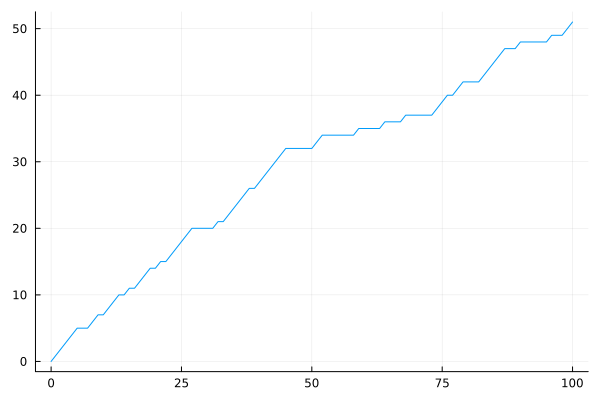

In [12]:
history = simulate(step)
plot(0:length(history)-1, history, label=nothing)

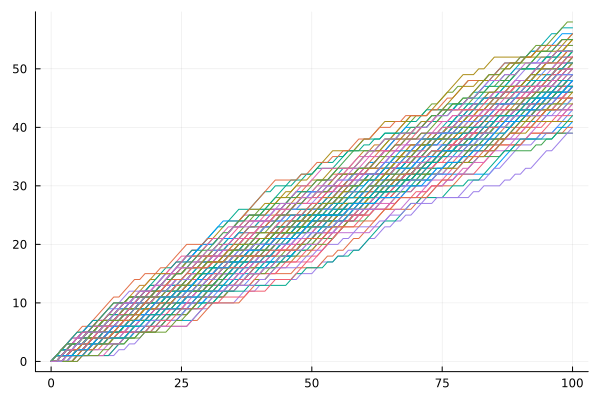

In [17]:
n = 100 
histories = [simulate(step, n_steps=n) for _ in 1:100]
plot(0:n, histories, label=nothing)

# Markov Processes

Let's see if you can recognize a Markov process.

In [18]:
#= (there is code here, it is just far to the right so that you can't read it) =#                                                                                                                                   g(history) = history[end] + 0.2*randn(); f(history) = 1.5*history[end] - 1*history[end-1] + 0.2*randn();

In [19]:
function sim(f, m)
    histories = []
    for i in 1:m
        history = [1., f([0., 1.])]
        for t in 2:20
            push!(history, f(history))
        end
        push!(histories, history)
    end
    return histories
end

sim (generic function with 1 method)

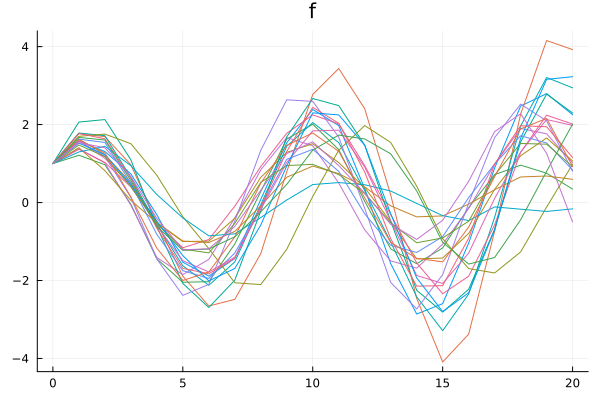

In [20]:
plot(0:20, sim(f, 20), title = "f", legend=nothing)

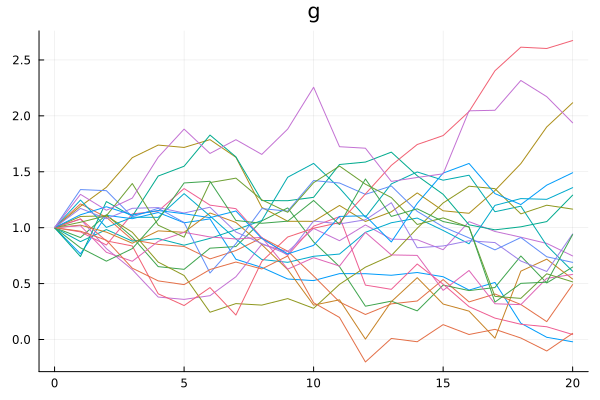

In [21]:
plot(0:20, sim(g, 20), title = "g", legend=nothing)